In [2]:
from sst_bst import SSTs
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

In [3]:
#from tangostationcontrol.statistics_writer.statistics_writer import main
#import sys
#import numpy as np
#import matplotlib.pyplot as plt
#import h5py
#from os import listdir
#from os.path import isfile,join
#from time import sleep

In [4]:
sat_freq=[137.62,137.9,137.1,137.1]
sat_ids0=[25338,28654,33591,40069]

print("Sat freq (MHz):",sat_freq)

freqs=200-np.arange(512)/512*100
sat_band=np.array([np.argmin(np.abs(freqs-freq1)) for freq1 in sat_freq])
print("Sat bands:",sat_band)
bmin=np.min(sat_band)
bmax=np.max(sat_band)+1

Sat freq (MHz): [137.62, 137.9, 137.1, 137.1]
Sat bands: [319 318 322 322]


Timestep: 60s, nstep=1440
Timestep: 60s, nstep=1440
Timestep: 60s, nstep=1440
[array([ 455, 1141]), array([ 608, 1300]), array([ 533, 1125]), array([394, 982]), array([ 430, 1116]), array([ 596, 1288]), array([ 522, 1113]), array([ 374, 1062]), array([ 504, 1090]), array([ 684, 1276]), array([ 510, 1101]), array([ 354, 1042])]


Text(0, 0.5, 'Alt (deg)')

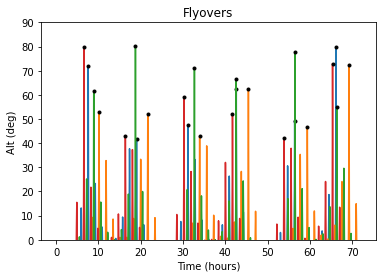

In [30]:
datestrs=['2022-11-25','2022-11-26','2022-11-27']
#SSTdate=datestr
#SSTdate='2022-10-16'
peak_idx=[]
peak_hrs=[]
for day,datestr in enumerate(datestrs):
 Dsat=np.load('CS1HBA0_'+datestr+'.npz')
 alts=Dsat['alts']
 azs=Dsat['azs']
 sat_names=Dsat['sat_names']
 Nsat=len(sat_names)
 Ntime=len(alts[0])
 Satstep=int(24*60*60/Ntime)
 print("Timestep: %is, nstep=%i"%(Satstep,Ntime))
 plt.gca().set_prop_cycle(None)
 for i in range(Nsat):
    alt=np.array(alts[i][:])
    grad=alt[1:]-alt[:-1]
    peak=(grad[:-1]>0)*(grad[1:]<0)*(alt[1:-1]>40)#40
    peak_index=np.compress(peak,np.array(range(len(peak))))+1
    peak_idx.append(peak_index)
    hrs=np.arange(len(alt))*Satstep/60/60+day*24
    peak_hrs.append(hrs[peak_index])
    plt.plot(hrs,alt)
    plt.plot(hrs[peak_index],alt[peak_index],'k.')
print(peak_idx)
plt.title("Flyovers")
plt.ylim(0,90)
plt.xlabel("Time (hours)")
plt.ylabel("Alt (deg)")

In [31]:
sst=SSTs('sst')


In [32]:
def P2dB(X): return 10*np.log10(X)
sis=range(8*3,12*3)

In [33]:
from datetime import timedelta;
peak_list=[]
for i,peaks in enumerate(peak_idx):
  for x,idx in enumerate(peaks):
    h=peak_hrs[i][x]
    tstart=datetime.fromisoformat("2022-11-25 00:00:00") 
    tend=tstart+timedelta(minutes=5)
    tstart+=timedelta(minutes=-5)
    tstart+=timedelta(hours=h)
    tend+=timedelta(hours=h)
    peak_list.append([i%4,tstart,tend])
    print(i,tstart,tend)

0 2022-11-25 07:30:00 2022-11-25 07:40:00
0 2022-11-25 18:56:00 2022-11-25 19:06:00
1 2022-11-25 10:03:00 2022-11-25 10:13:00
1 2022-11-25 21:35:00 2022-11-25 21:45:00
2 2022-11-25 08:48:00 2022-11-25 08:58:00
2 2022-11-25 18:40:00 2022-11-25 18:50:00
3 2022-11-25 06:29:00 2022-11-25 06:39:00
3 2022-11-25 16:17:00 2022-11-25 16:27:00
4 2022-11-26 07:05:00 2022-11-26 07:15:00
4 2022-11-26 18:31:00 2022-11-26 18:41:00
5 2022-11-26 09:51:00 2022-11-26 10:01:00
5 2022-11-26 21:23:00 2022-11-26 21:33:00
6 2022-11-26 08:37:00 2022-11-26 08:47:00
6 2022-11-26 18:28:00 2022-11-26 18:38:00
7 2022-11-26 06:09:00 2022-11-26 06:19:00
7 2022-11-26 17:37:00 2022-11-26 17:47:00
8 2022-11-27 08:19:00 2022-11-27 08:29:00
8 2022-11-27 18:05:00 2022-11-27 18:15:00
9 2022-11-27 11:19:00 2022-11-27 11:29:00
9 2022-11-27 21:11:00 2022-11-27 21:21:00
10 2022-11-27 08:25:00 2022-11-27 08:35:00
10 2022-11-27 18:16:00 2022-11-27 18:26:00
11 2022-11-27 05:49:00 2022-11-27 05:59:00
11 2022-11-27 17:17:00 2022-11-

Load SST sst/SST_2022-11-25-17-58-13.h5
Load SST sst/SST_2022-11-25-18-58-13.h5
(200, 12)
Load SST sst/SST_2022-11-25-20-58-13.h5
(200, 12)
Load SST sst/SST_2022-11-25-17-58-13.h5
(200, 12)
Load SST sst/SST_2022-11-25-15-58-13.h5
(200, 12)
Load SST sst/SST_2022-11-26-06-58-13.h5
(200, 12)
Load SST sst/SST_2022-11-26-17-58-13.h5
(200, 12)
Load SST sst/SST_2022-11-26-08-58-13.h5
Load SST sst/SST_2022-11-26-09-58-13.h5
(200, 12)
Load SST sst/SST_2022-11-26-20-58-13.h5
(200, 12)
Load SST sst/SST_2022-11-26-07-58-13.h5
(200, 12)
Load SST sst/SST_2022-11-26-17-58-13.h5
(200, 12)
Load SST sst/SST_2022-11-26-05-58-13.h5
(200, 12)
Load SST sst/SST_2022-11-26-16-58-13.h5
(200, 12)
Load SST sst/SST_2022-11-27-07-58-13.h5
(200, 12)
Load SST sst/SST_2022-11-27-17-58-13.h5
(200, 12)
Load SST sst/SST_2022-11-27-10-58-13.h5
(200, 12)
Load SST sst/SST_2022-11-27-20-58-13.h5
(200, 12)
Load SST sst/SST_2022-11-27-07-58-13.h5
(200, 12)
Load SST sst/SST_2022-11-27-17-58-13.h5
(200, 12)
Load SST sst/SST_202

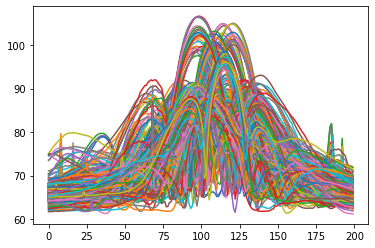

In [34]:
tstep=3 #3 second avg
sst_data=[]
for i,tstart,tend in peak_list:
    D=sst.getData(tstart,tend,sis,sat_band[i]) #second data
    if len(D)==0:
        sst_data.append(None)
        continue;
    n1,n2=D.shape
    na=n1//tstep
    D=np.mean(D[:na*tstep].reshape([na,tstep,n2]),axis=1)
    sst_data.append(D)
    print(D.shape)
    plt.plot(P2dB(D))

In [35]:
from sats import calcSat
from astropy.coordinates import EarthLocation
from astropy import units as u

LOFARloc=EarthLocation(lat=52.91161366*u.deg,lon=6.86862350*u.deg,height=50.165*u.m);#CS001_HBA0
peak_alts=[]
peak_azs=[]
for i,tstart,tend in peak_list:
    alt,az=calcSat(sat_ids0[i],LOFARloc,tstart+timedelta(seconds=1),tend+timedelta(seconds=1),tstep) 
    peak_alts.append(alt)
    peak_azs.append(az)
    plt.plot(alt)

Sat name= NOAA 15 2022-11-25 07:30:01 2022-11-25 07:40:01 200
Sat name= NOAA 15 2022-11-25 18:56:01 2022-11-25 19:06:01 200
Sat name= NOAA 18 2022-11-25 10:03:01 2022-11-25 10:13:01 200
Sat name= NOAA 18 2022-11-25 21:35:01 2022-11-25 21:45:01 200
Sat name= NOAA 19 2022-11-25 08:48:01 2022-11-25 08:58:01 200
Sat name= NOAA 19 2022-11-25 18:40:01 2022-11-25 18:50:01 200
Sat name= METEOR-M 2 2022-11-25 06:29:01 2022-11-25 06:39:01 200
Sat name= METEOR-M 2 2022-11-25 16:17:01 2022-11-25 16:27:01 200
Sat name= NOAA 15 2022-11-26 07:05:01 2022-11-26 07:15:01 200
Sat name= NOAA 15 2022-11-26 18:31:01 2022-11-26 18:41:01 200
Sat name= NOAA 18 2022-11-26 09:51:01 2022-11-26 10:01:01 200
Sat name= NOAA 18 2022-11-26 21:23:01 2022-11-26 21:33:01 200
Sat name= NOAA 19 2022-11-26 08:37:01 2022-11-26 08:47:01 200
Sat name= NOAA 19 2022-11-26 18:28:01 2022-11-26 18:38:01 200
Sat name= METEOR-M 2 2022-11-26 06:09:01 2022-11-26 06:19:01 200
Sat name= METEOR-M 2 2022-11-26 17:37:01 2022-11-26 17:47:01 

(200, 12)
(200, 12)
(200, 12)
(200, 12)
(200, 12)
(200, 12)
(200, 12)
(200, 12)
(200, 12)
(200, 12)
(200, 12)
(200, 12)
(200, 12)
(200, 12)
(200, 12)
(200, 12)
(200, 12)
(200, 12)
(200, 12)
(200, 12)


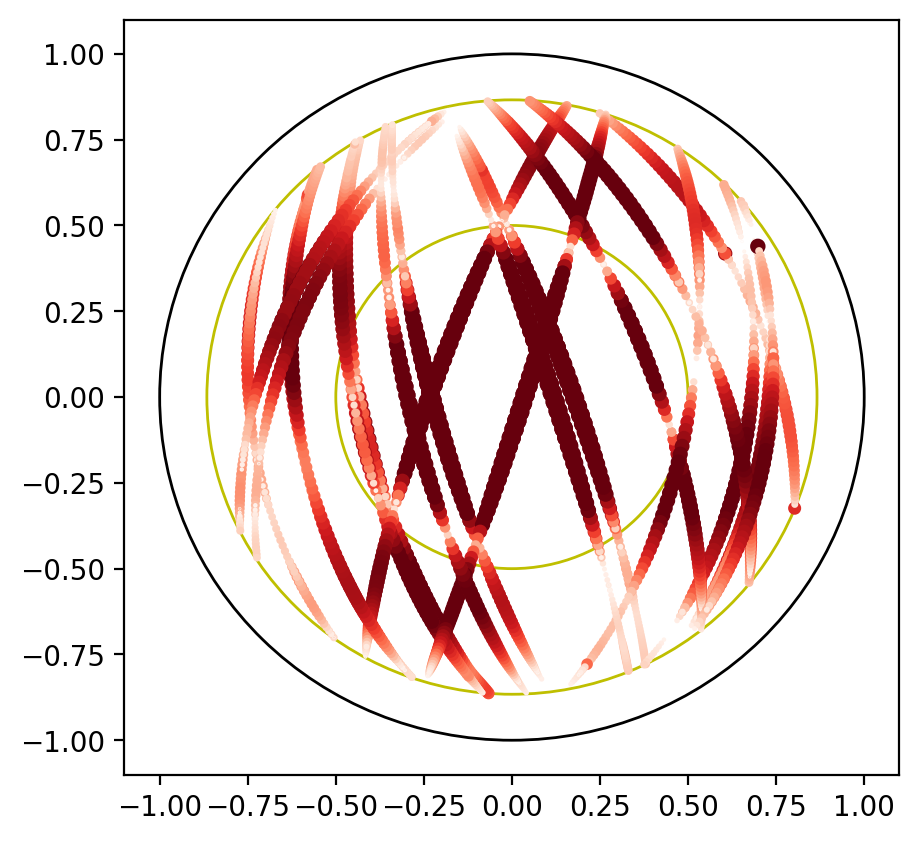

In [36]:
plt.figure(dpi=200,figsize=(5,5))
ax = plt.gca()
ax.add_patch(plt.Circle((0, 0), 1.0, color='k',fill=False))
ax.add_patch(plt.Circle((0, 0), 0.5, color='y',fill=False))
ax.add_patch(plt.Circle((0, 0), np.cos(30/180*np.pi), color='y',fill=False))
markers=['o','^','+','x','v','^']
for i,info in enumerate(peak_list):
    if sst_data[i] is None: continue;
    az=np.array(peak_azs[i])/180*np.pi
    alt=np.array(peak_alts[i])/180*np.pi
    D2=P2dB(sst_data[i])-70
    print(D2.shape)
    for hbat in [0,1]:
     mask=(alt>30/180*np.pi)*(D2[:,hbat]>0)
     X=np.compress(mask, np.cos(alt)*np.sin(az) )
     Y=np.compress(mask, np.cos(alt)*np.cos(az))
     z=np.compress(mask, D2[:,hbat])
     plt.scatter(X,Y,s=z,c=z,cmap='Reds',marker=markers[hbat//2],vmin=0,vmax=20)

/tmp/ipykernel_15393/4091857417.py:21: RuntimeWarning: divide by zero encountered in true_divide
  plt.plot(X/mask,Y/mask,'k:',linewidth=0.3)
/tmp/ipykernel_15393/4091857417.py:21: RuntimeWarning: divide by zero encountered in true_divide
  plt.plot(X/mask,Y/mask,'k:',linewidth=0.3)
/tmp/ipykernel_15393/4091857417.py:21: RuntimeWarning: divide by zero encountered in true_divide
  plt.plot(X/mask,Y/mask,'k:',linewidth=0.3)
/tmp/ipykernel_15393/4091857417.py:21: RuntimeWarning: divide by zero encountered in true_divide
  plt.plot(X/mask,Y/mask,'k:',linewidth=0.3)
/tmp/ipykernel_15393/4091857417.py:21: RuntimeWarning: divide by zero encountered in true_divide
  plt.plot(X/mask,Y/mask,'k:',linewidth=0.3)
/tmp/ipykernel_15393/4091857417.py:21: RuntimeWarning: divide by zero encountered in true_divide
  plt.plot(X/mask,Y/mask,'k:',linewidth=0.3)
/tmp/ipykernel_15393/4091857417.py:21: RuntimeWarning: divide by zero encountered in true_divide
  plt.plot(X/mask,Y/mask,'k:',linewidth=0.3)
/tmp/i

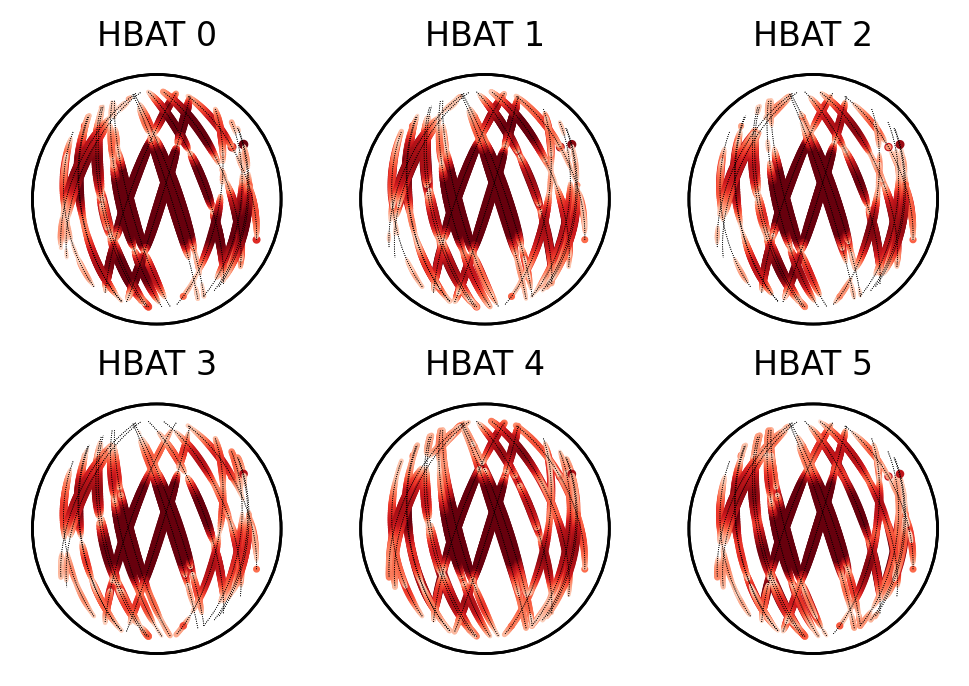

In [41]:
def XY(alt,az):
  X=np.cos(alt/180*np.pi)*np.sin(az/180*np.pi)
  Y=np.cos(alt/180*np.pi)*np.cos(az/180*np.pi)
  return X,Y

plt.figure(dpi=200,figsize=(6,4))
markers=['o','o']
for hbat in range(12):
  ax=plt.subplot(2, 3, hbat//2+1)
  ax = plt.gca()
  ax.add_patch(plt.Circle((0, 0), 1.0, color='k',fill=False))
  plt.axis('off')
  plt.title('HBAT %i'%(hbat//2))
  for i,info in enumerate(peak_list):
    if sst_data[i] is None: continue;
    az=np.array(peak_azs[i])/180*np.pi
    alt=np.array(peak_alts[i])/180*np.pi
    mask=(alt>30/180*np.pi)*1
    X=np.cos(alt)*np.sin(az)
    Y=np.cos(alt)*np.cos(az)
    plt.plot(X/mask,Y/mask,'k:',linewidth=0.3)
for hbat in range(12):
  ax=plt.subplot(2, 3, hbat//2+1)
  for i,info in enumerate(peak_list):
    if sst_data[i] is None: continue;
    az=np.array(peak_azs[i])/180*np.pi
    alt=np.array(peak_alts[i])/180*np.pi
    D2=P2dB(sst_data[i])-70
    mask=(alt>30/180*np.pi)*1
    X=np.cos(alt)*np.sin(az)
    Y=np.cos(alt)*np.cos(az)
    X=np.compress(mask, X )
    Y=np.compress(mask, Y)
    z=np.compress(mask, D2[:,hbat])
    mask=(alt>10/180*np.pi)*(D2[:,hbat]>0)
    plt.scatter(X,Y,s=(z-3)/3,c=z,cmap='Reds',marker=markers[hbat%2],vmin=0,vmax=20)
plt.savefig("sats2.jpg")
#plot = plt.scatter(x, y, s= 10, c = z, cmap='coolwarm')

/tmp/ipykernel_15393/2353149582.py:21: RuntimeWarning: divide by zero encountered in true_divide
  plt.plot(X/mask,Y/mask,'k:',linewidth=0.3)
/tmp/ipykernel_15393/2353149582.py:21: RuntimeWarning: divide by zero encountered in true_divide
  plt.plot(X/mask,Y/mask,'k:',linewidth=0.3)
/tmp/ipykernel_15393/2353149582.py:21: RuntimeWarning: divide by zero encountered in true_divide
  plt.plot(X/mask,Y/mask,'k:',linewidth=0.3)
/tmp/ipykernel_15393/2353149582.py:21: RuntimeWarning: divide by zero encountered in true_divide
  plt.plot(X/mask,Y/mask,'k:',linewidth=0.3)
/tmp/ipykernel_15393/2353149582.py:21: RuntimeWarning: divide by zero encountered in true_divide
  plt.plot(X/mask,Y/mask,'k:',linewidth=0.3)
/tmp/ipykernel_15393/2353149582.py:21: RuntimeWarning: divide by zero encountered in true_divide
  plt.plot(X/mask,Y/mask,'k:',linewidth=0.3)
/tmp/ipykernel_15393/2353149582.py:21: RuntimeWarning: divide by zero encountered in true_divide
  plt.plot(X/mask,Y/mask,'k:',linewidth=0.3)
/tmp/i

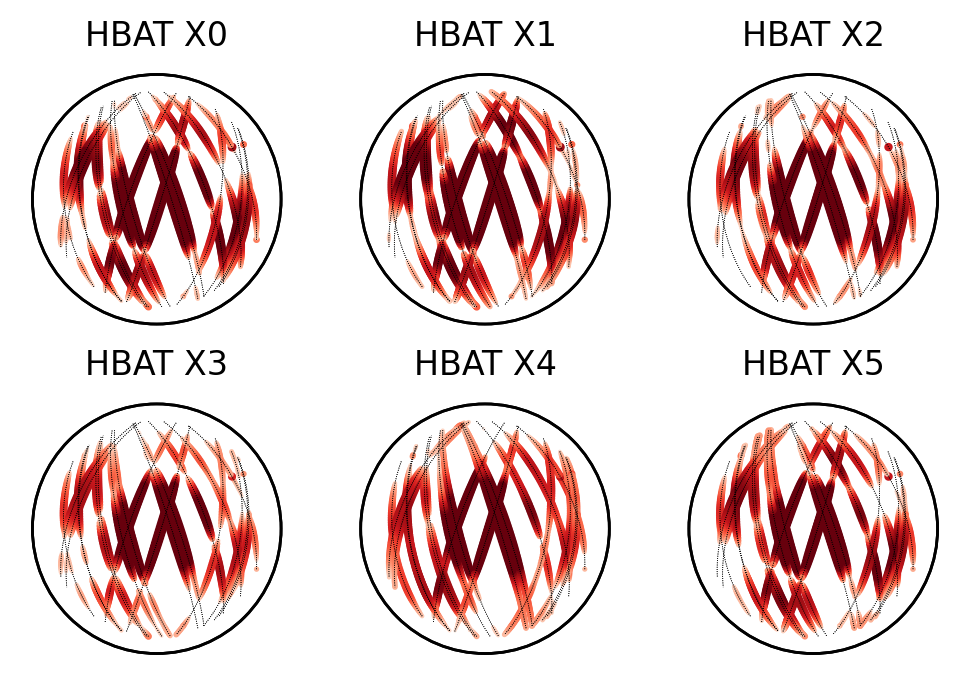

In [42]:
def XY(alt,az):
  X=np.cos(alt/180*np.pi)*np.sin(az/180*np.pi)
  Y=np.cos(alt/180*np.pi)*np.cos(az/180*np.pi)
  return X,Y

plt.figure(dpi=200,figsize=(6,4))
markers=['o','o']
for hbat in range(12):
  ax=plt.subplot(2, 3, hbat//2+1)
  ax = plt.gca()
  ax.add_patch(plt.Circle((0, 0), 1.0, color='k',fill=False))
  plt.axis('off')
  plt.title('HBAT X%i'%(hbat//2))
  for i,info in enumerate(peak_list):
    if sst_data[i] is None: continue;
    az=np.array(peak_azs[i])/180*np.pi
    alt=np.array(peak_alts[i])/180*np.pi
    mask=(alt>30/180*np.pi)*1
    X=np.cos(alt)*np.sin(az)
    Y=np.cos(alt)*np.cos(az)
    plt.plot(X/mask,Y/mask,'k:',linewidth=0.3)
for hbat in range(6):
  ax=plt.subplot(2, 3, hbat+1)
  for i,info in enumerate(peak_list):
    if sst_data[i] is None: continue;
    az=np.array(peak_azs[i])/180*np.pi
    alt=np.array(peak_alts[i])/180*np.pi
    D2=P2dB(sst_data[i])-70
    mask=(alt>30/180*np.pi)*1
    X=np.cos(alt)*np.sin(az)
    Y=np.cos(alt)*np.cos(az)
    X=np.compress(mask, X )
    Y=np.compress(mask, Y)
    z=np.compress(mask, D2[:,2*hbat])
    mask=(alt>10/180*np.pi)*(D2[:,2*hbat]>0)
    plt.scatter(X,Y,s=(z-3)/3,c=z,cmap='Reds',marker='o',vmin=0,vmax=20)
plt.savefig("sats2.jpg")
#plot = plt.scatter(x, y, s= 10, c = z, cmap='coolwarm')

/tmp/ipykernel_15393/1250679365.py:21: RuntimeWarning: divide by zero encountered in true_divide
  plt.plot(X/mask,Y/mask,'k:',linewidth=0.3)
/tmp/ipykernel_15393/1250679365.py:21: RuntimeWarning: divide by zero encountered in true_divide
  plt.plot(X/mask,Y/mask,'k:',linewidth=0.3)
/tmp/ipykernel_15393/1250679365.py:21: RuntimeWarning: divide by zero encountered in true_divide
  plt.plot(X/mask,Y/mask,'k:',linewidth=0.3)
/tmp/ipykernel_15393/1250679365.py:21: RuntimeWarning: divide by zero encountered in true_divide
  plt.plot(X/mask,Y/mask,'k:',linewidth=0.3)
/tmp/ipykernel_15393/1250679365.py:21: RuntimeWarning: divide by zero encountered in true_divide
  plt.plot(X/mask,Y/mask,'k:',linewidth=0.3)
/tmp/ipykernel_15393/1250679365.py:21: RuntimeWarning: divide by zero encountered in true_divide
  plt.plot(X/mask,Y/mask,'k:',linewidth=0.3)
/tmp/ipykernel_15393/1250679365.py:21: RuntimeWarning: divide by zero encountered in true_divide
  plt.plot(X/mask,Y/mask,'k:',linewidth=0.3)
/tmp/i

/tmp/ipykernel_15393/1250679365.py:21: RuntimeWarning: divide by zero encountered in true_divide
  plt.plot(X/mask,Y/mask,'k:',linewidth=0.3)
/tmp/ipykernel_15393/1250679365.py:21: RuntimeWarning: divide by zero encountered in true_divide
  plt.plot(X/mask,Y/mask,'k:',linewidth=0.3)
/tmp/ipykernel_15393/1250679365.py:21: RuntimeWarning: divide by zero encountered in true_divide
  plt.plot(X/mask,Y/mask,'k:',linewidth=0.3)
/tmp/ipykernel_15393/1250679365.py:21: RuntimeWarning: divide by zero encountered in true_divide
  plt.plot(X/mask,Y/mask,'k:',linewidth=0.3)
/tmp/ipykernel_15393/1250679365.py:21: RuntimeWarning: divide by zero encountered in true_divide
  plt.plot(X/mask,Y/mask,'k:',linewidth=0.3)
/tmp/ipykernel_15393/1250679365.py:21: RuntimeWarning: divide by zero encountered in true_divide
  plt.plot(X/mask,Y/mask,'k:',linewidth=0.3)
/tmp/ipykernel_15393/1250679365.py:21: RuntimeWarning: divide by zero encountered in true_divide
  plt.plot(X/mask,Y/mask,'k:',linewidth=0.3)
/tmp/i

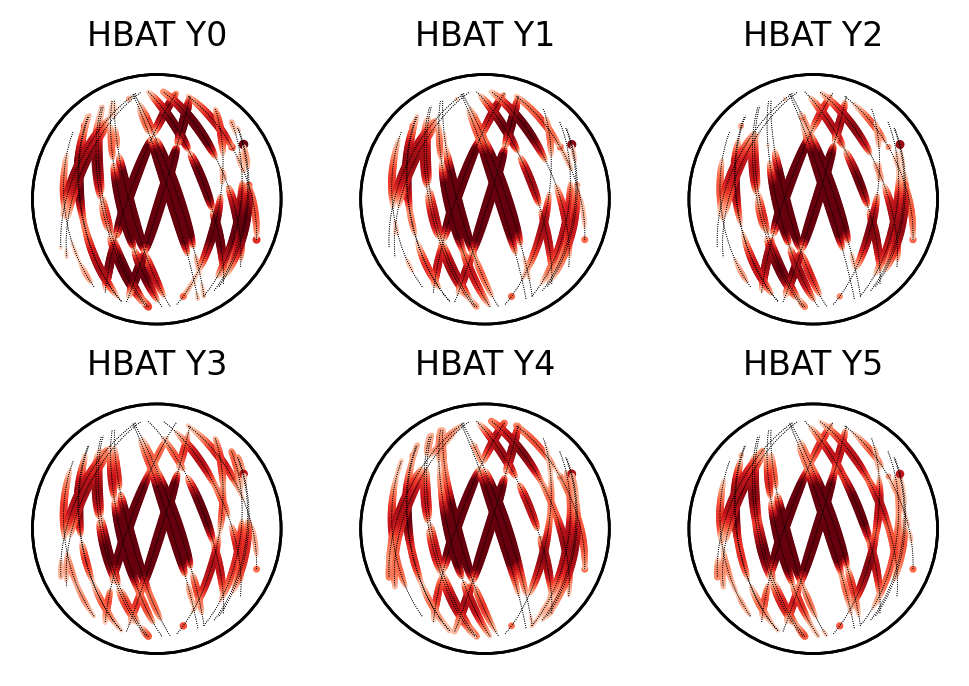

In [43]:
def XY(alt,az):
  X=np.cos(alt/180*np.pi)*np.sin(az/180*np.pi)
  Y=np.cos(alt/180*np.pi)*np.cos(az/180*np.pi)
  return X,Y

plt.figure(dpi=200,figsize=(6,4))
markers=['o','o']
for hbat in range(12):
  ax=plt.subplot(2, 3, hbat//2+1)
  ax = plt.gca()
  ax.add_patch(plt.Circle((0, 0), 1.0, color='k',fill=False))
  plt.axis('off')
  plt.title('HBAT Y%i'%(hbat//2))
  for i,info in enumerate(peak_list):
    if sst_data[i] is None: continue;
    az=np.array(peak_azs[i])/180*np.pi
    alt=np.array(peak_alts[i])/180*np.pi
    mask=(alt>30/180*np.pi)*1
    X=np.cos(alt)*np.sin(az)
    Y=np.cos(alt)*np.cos(az)
    plt.plot(X/mask,Y/mask,'k:',linewidth=0.3)
for hbat in range(6):
  ax=plt.subplot(2, 3, hbat+1)
  for i,info in enumerate(peak_list):
    if sst_data[i] is None: continue;
    az=np.array(peak_azs[i])/180*np.pi
    alt=np.array(peak_alts[i])/180*np.pi
    D2=P2dB(sst_data[i])-70
    mask=(alt>30/180*np.pi)*1
    X=np.cos(alt)*np.sin(az)
    Y=np.cos(alt)*np.cos(az)
    X=np.compress(mask, X )
    Y=np.compress(mask, Y)
    z=np.compress(mask, D2[:,2*hbat+1])
    mask=(alt>10/180*np.pi)*(D2[:,2*hbat+1]>0)
    plt.scatter(X,Y,s=(z-3)/3,c=z,cmap='Reds',marker='o',vmin=0,vmax=20)
plt.savefig("sats2b.jpg")
#plot = plt.scatter(x, y, s= 10, c = z, cmap='coolwarm')